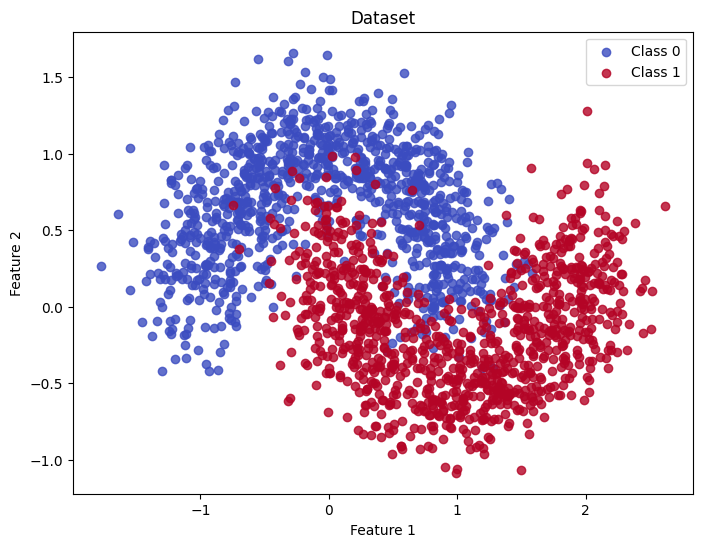

In [262]:
# Create a dataset of 2D points difficult to cluster
# Make moons with a small amount of noise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Number of samples
n_samples = 2000

# Generate the dataset
X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=0)

class_colors = [(0.229805, 0.298717, 0.751333), (0.705841, 0.015334, 0.150158)]

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c=[class_colors[0]], alpha=0.8, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c=[class_colors[1]], alpha=0.8, label='Class 1')
plt.legend()
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



Training set shape: (1280, 2) (1280,)
Validation set shape: (320, 2) (320,)
Test set shape: (400, 2) (400,)


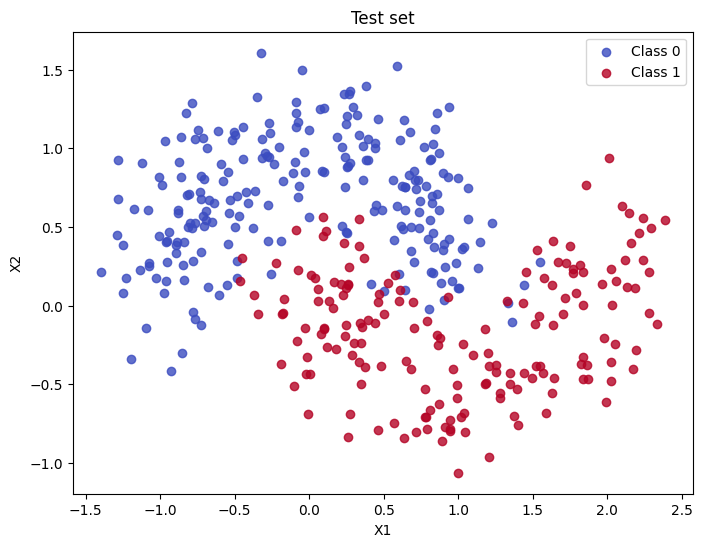

In [251]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam

seed = 10

xtrn, xtst, ytrn, ytst = train_test_split(X, y, test_size=0.2, random_state=seed)
xtrn, xval, ytrn, yval = train_test_split(xtrn, ytrn, test_size=0.2, random_state=seed)

# Print shapes
print('Training set shape:', xtrn.shape, ytrn.shape)
print('Validation set shape:', xval.shape, yval.shape)
print('Test set shape:', xtst.shape, ytst.shape)

# Plot test set
plt.figure(figsize=(8, 6))
plt.scatter(xtst[ytst == 0, 0], xtst[ytst == 0, 1], c=[class_colors[0]], label='Class 0', alpha=0.8)
plt.scatter(xtst[ytst == 1, 0], xtst[ytst == 1, 1], c=[class_colors[1]], label='Class 1', alpha=0.8)
plt.legend()
plt.title('Test set')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [279]:
# Create the MLP
model = Sequential()

input_layer = Input(shape=(2,), name='input_layer')
layer1 = Dense(28, activation='relu', name='layer1')(input_layer)
layer2 = Dense(8, activation='relu', name='layer2')(layer1)
layer3 = Dense(4, activation='relu', name='layer3')(layer2)
output_layer = Dense(2, activation='softmax', name='output_layer')(layer3)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 28)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 8)              │           232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362 (1.41 KB)

 Trainable params: 362 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [280]:
# Train the model
bs = xtrn.shape[0]//5
history = model.fit(xtrn, ytrn, epochs=220, batch_size=bs, validation_data=(xval, yval))


Epoch 1/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8340 - loss: 0.6872 - val_accuracy: 0.8281 - val_loss: 0.6845
Epoch 2/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8260 - loss: 0.6841 - val_accuracy: 0.8406 - val_loss: 0.6811
Epoch 3/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8256 - loss: 0.6808 - val_accuracy: 0.7781 - val_loss: 0.6773
Epoch 4/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7734 - loss: 0.6770 - val_accuracy: 0.7500 - val_loss: 0.6729
Epoch 5/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7175 - loss: 0.6724 - val_accuracy: 0.7406 - val_loss: 0.6678
Epoch 6/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7234 - loss: 0.6682 - val_accuracy: 0.7594 - val_loss: 0.6621
Epoch 7/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7394 - loss: 0.6624 - val_accuracy: 0.7469 - val_loss: 0.6559
Epoch 8/220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7474 - loss: 0.6539 - val_accuracy: 0.7812 - val_loss:

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1130 
Test loss: 0.1194
Test accuracy: 94.75%


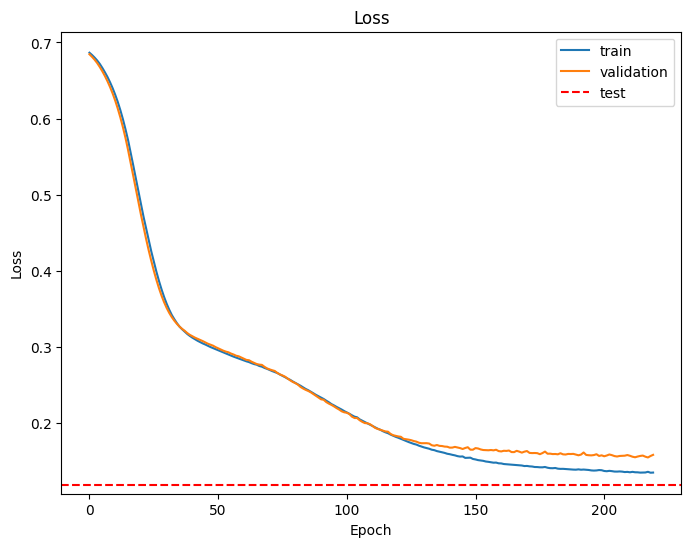

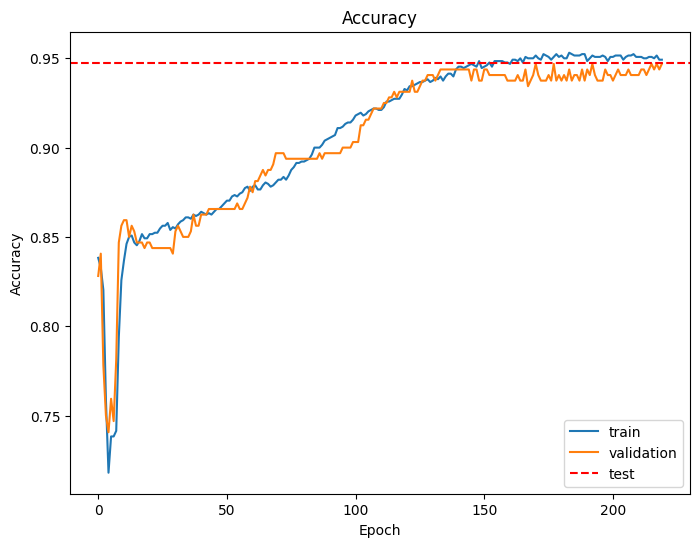

In [281]:
# Evaluar el modelo en el test set
test_loss, test_accuracy = model.evaluate(xtst, ytst)  # xtst y ytst son los datos de prueba

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy*100:.2f}%')

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.axhline(y=test_loss, color='r', linestyle='--', label='test')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='test')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━

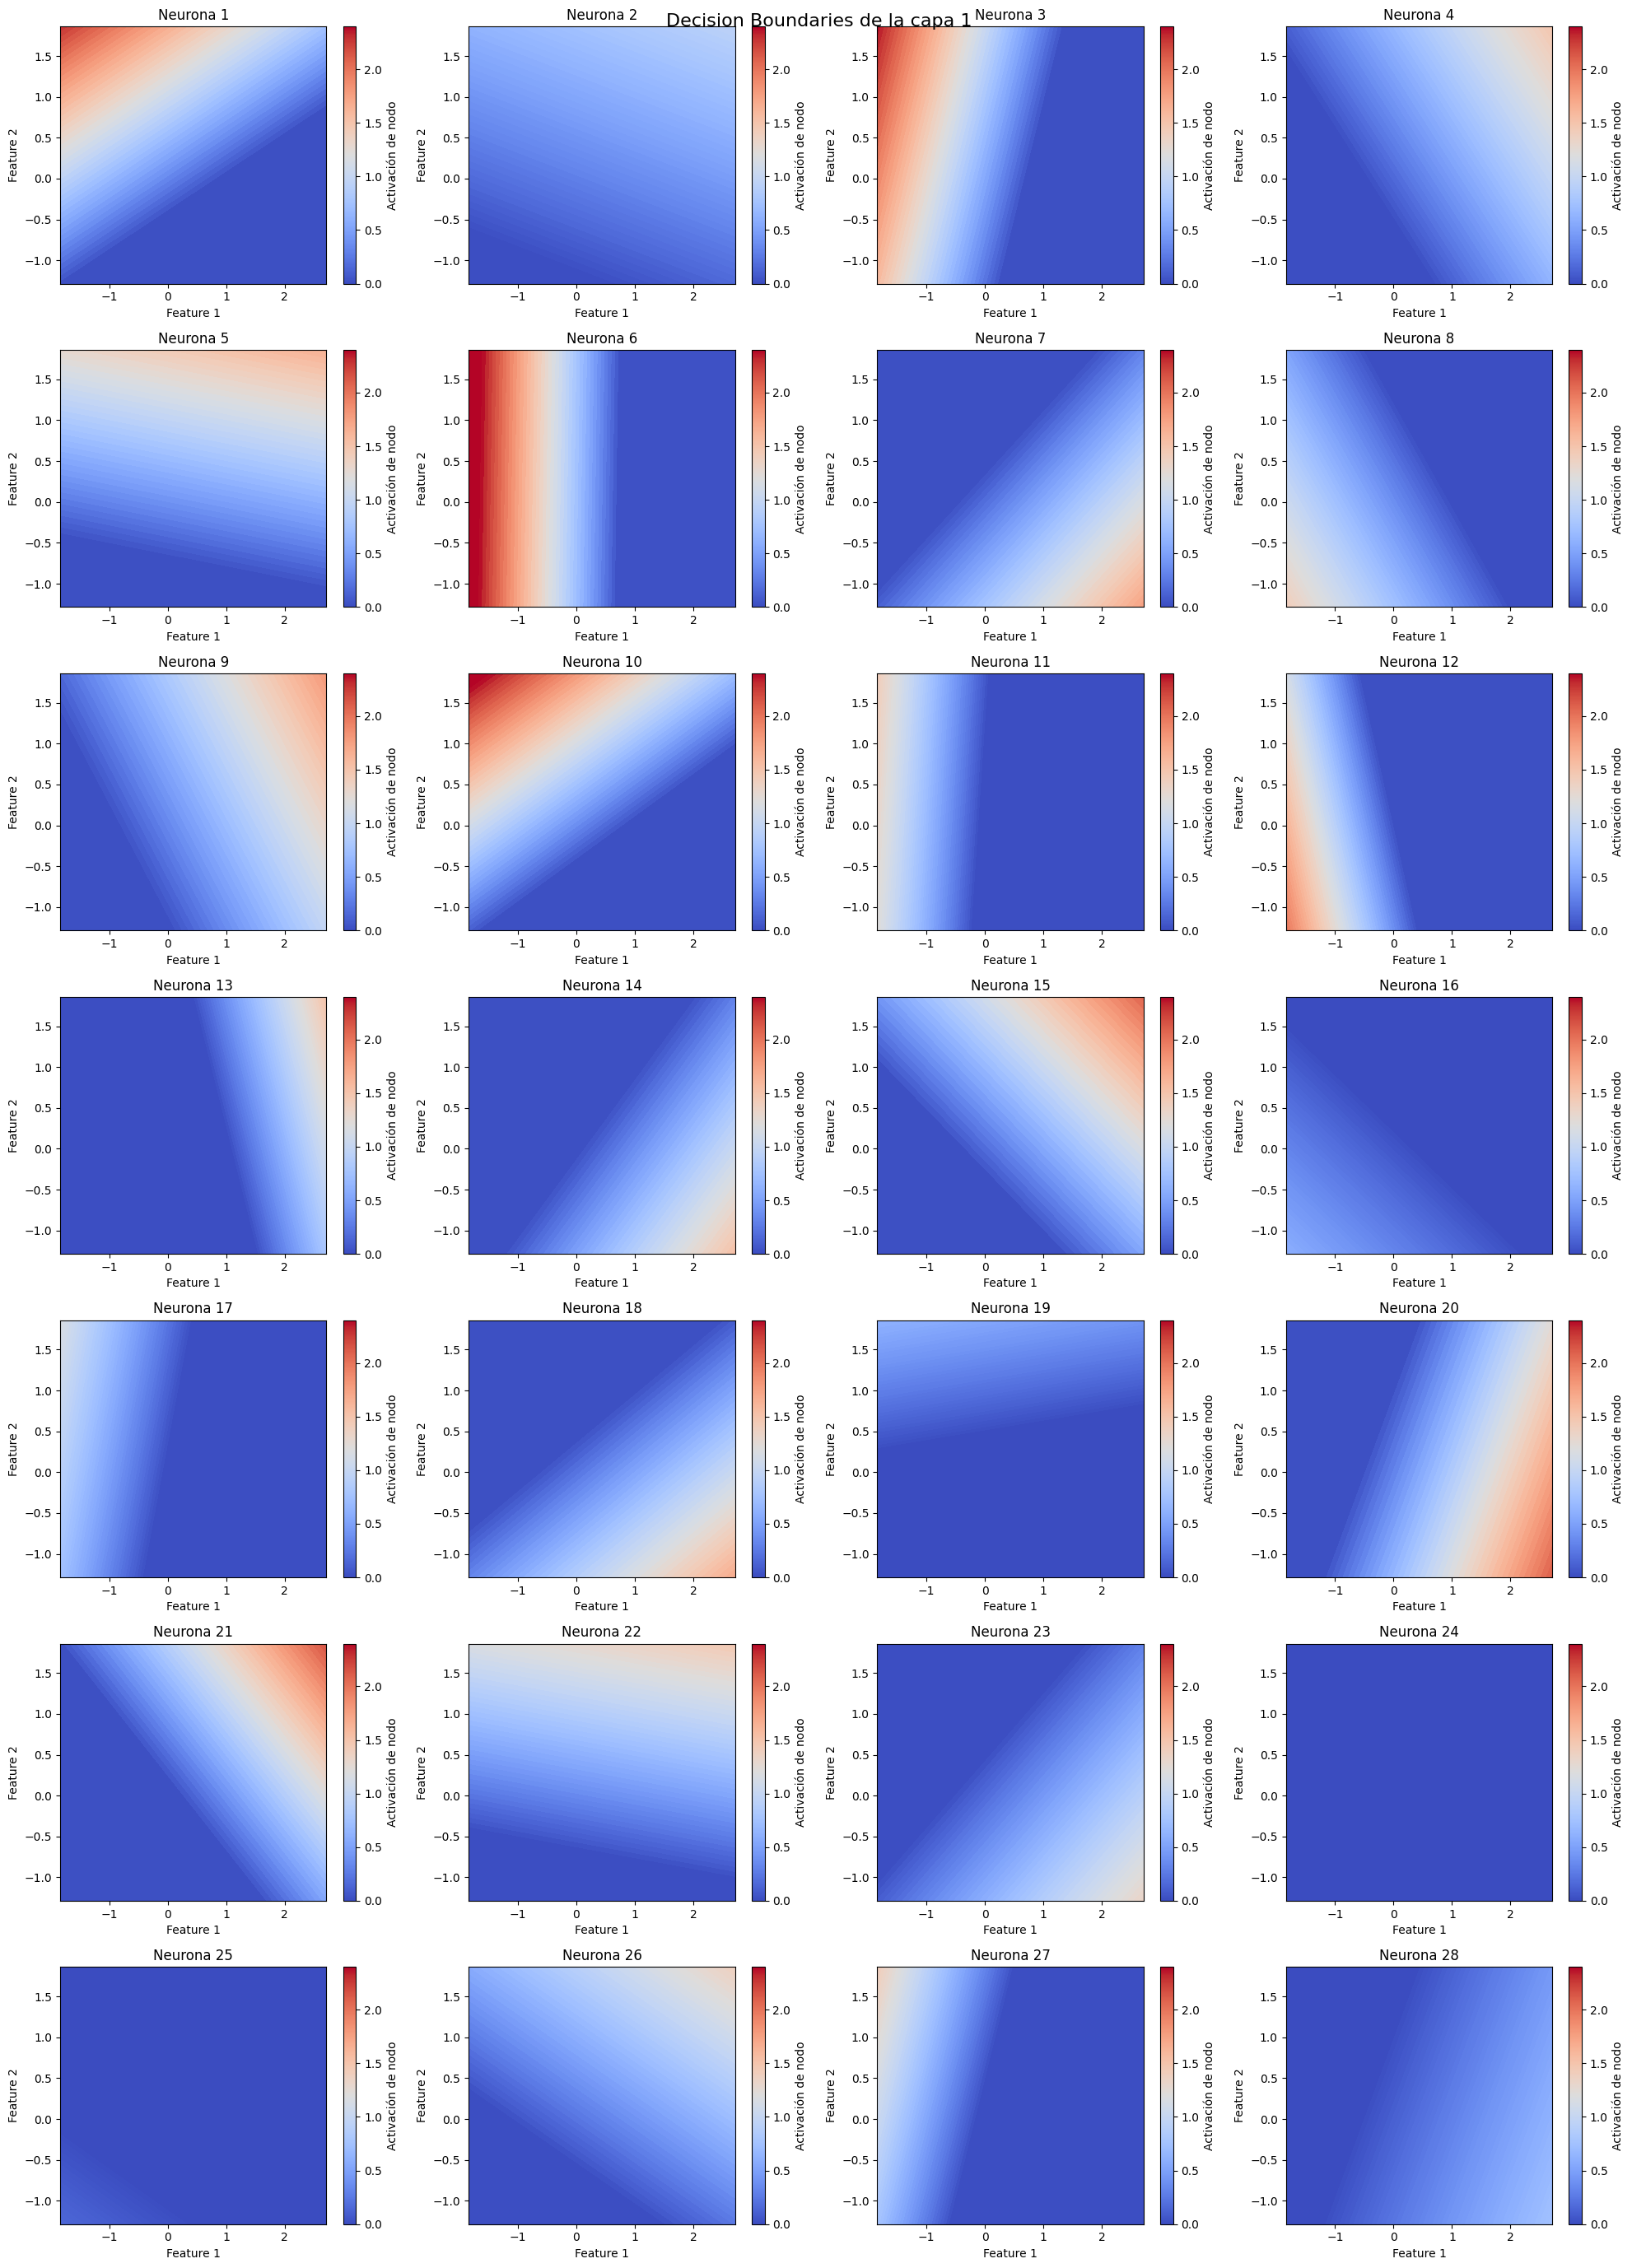

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


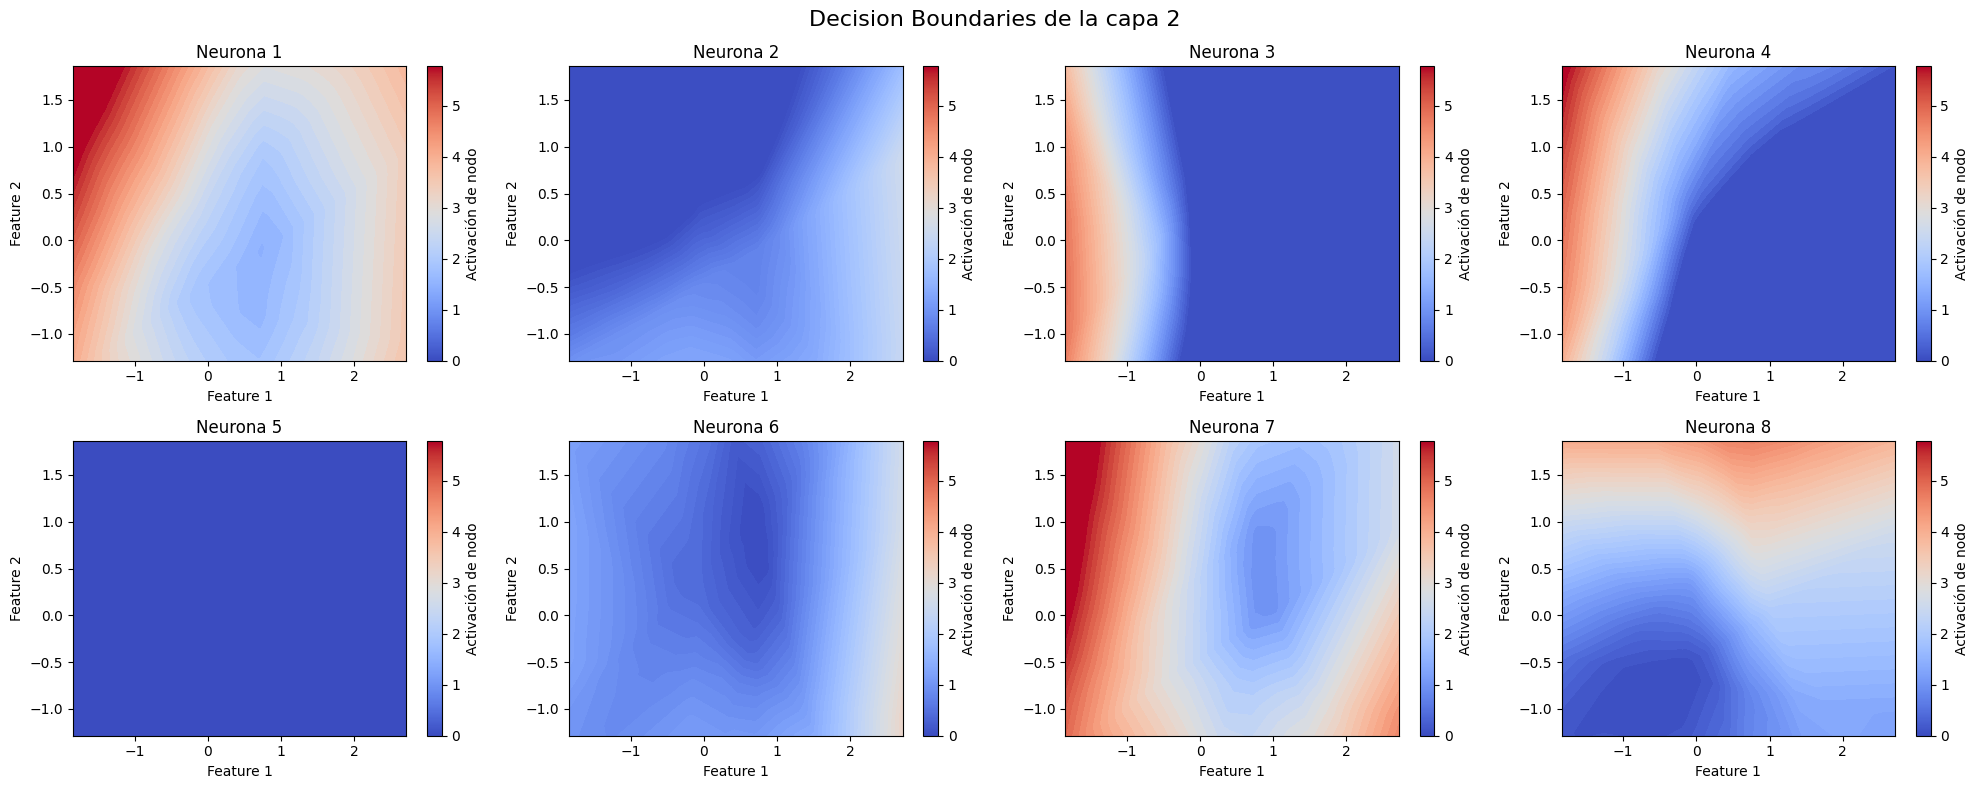

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


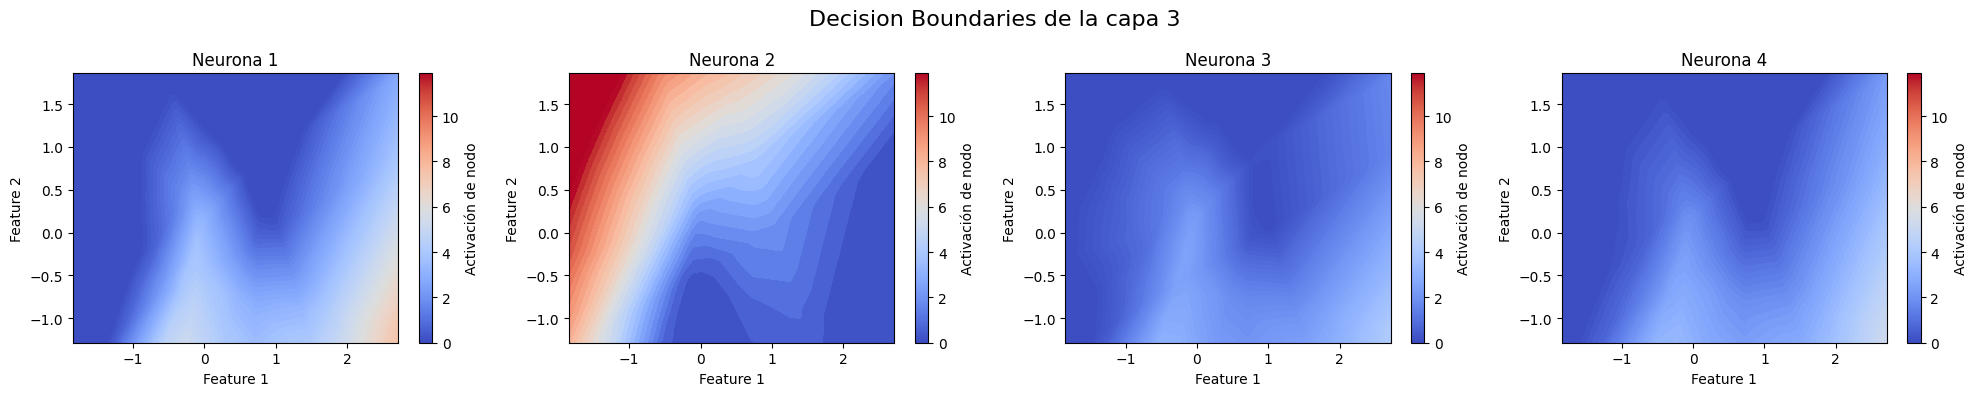

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


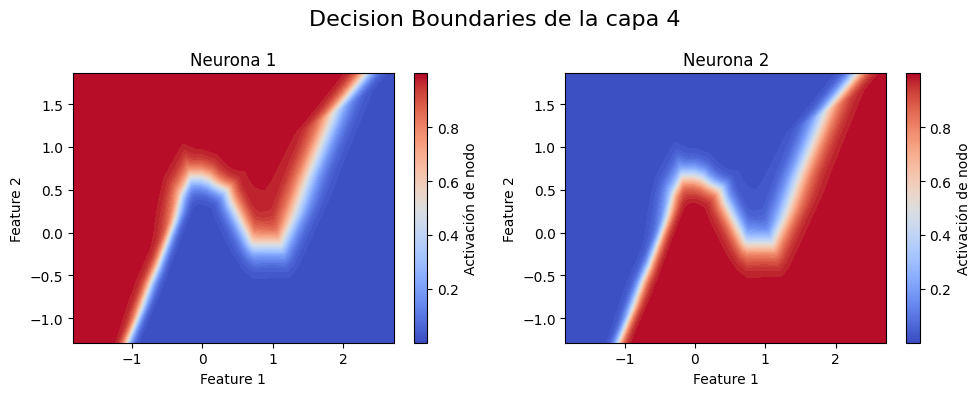

In [282]:
import matplotlib.pyplot as plt
from matplotlib import colors

set = xtrn

# Crear un modelo intermedio para obtener salidas de cada capa
intermediate_layer_model = Model(inputs=model.input, outputs=[layer1, layer2, layer3, output_layer])
intermediate_outputs = intermediate_layer_model.predict(set)

plot_grid = [[7, 4], [2, 4], [1, 4], [1, 2]]  # Número de subplots por capa

# Función para graficar activaciones y decision boundary por capa y neurona
def plot_layer_outputs_with_boundaries(intermediate_outputs, set):
    x_margin = 0.2
    y_margin = 0.2
    
    x_min, x_max = set[:, 0].min() - x_margin, set[:, 0].max() + x_margin
    y_min, y_max = set[:, 1].min() - y_margin, set[:, 1].max() + y_margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))  # Grid de puntos
    
    # Para cada capa
    for layer_idx, output in enumerate(intermediate_outputs, start=1):
        num_neurons = output.shape[1]  # Número de neuronas en la capa actual
        
        rows, cols = plot_grid[layer_idx - 1]

        fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
        fig.suptitle(f"Decision Boundaries de la capa {layer_idx}", fontsize=16)
        
        axes = np.array(axes).reshape(-1)  # Asegura que axes sea un array plano
        
        # Normalización para los colores (activaciones)
        norm = colors.Normalize(vmin=output.min(), vmax=output.max())
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
        sm.set_array([])  # Para que la barra de colores no se duplique
        
        for neuron_idx in range(num_neurons):
            # Obtener activaciones del grid
            grid_points = np.c_[xx.ravel(), yy.ravel()]
            grid_output = intermediate_layer_model.predict(grid_points)[layer_idx - 1][:, neuron_idx]
            grid_output = grid_output.reshape(xx.shape)
            
            # Graficar decision boundary y activaciones
            ax = axes[neuron_idx]
            ax.contourf(xx, yy, grid_output, levels=50, cmap='coolwarm', alpha=1, norm=norm, linestyles='none')
            ax.set_title(f"Neurona {neuron_idx + 1}")
            ax.set_xlabel("Feature 1")
            ax.set_ylabel("Feature 2")
            fig.colorbar(sm, ax=ax, label="Activación de nodo")  # Usamos el mismo ScalarMappable para la barra de colores
        
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

plot_layer_outputs_with_boundaries(intermediate_outputs, set)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


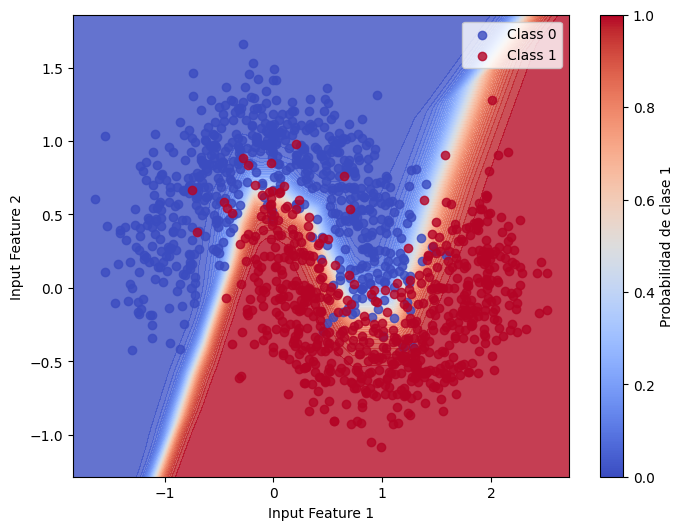

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


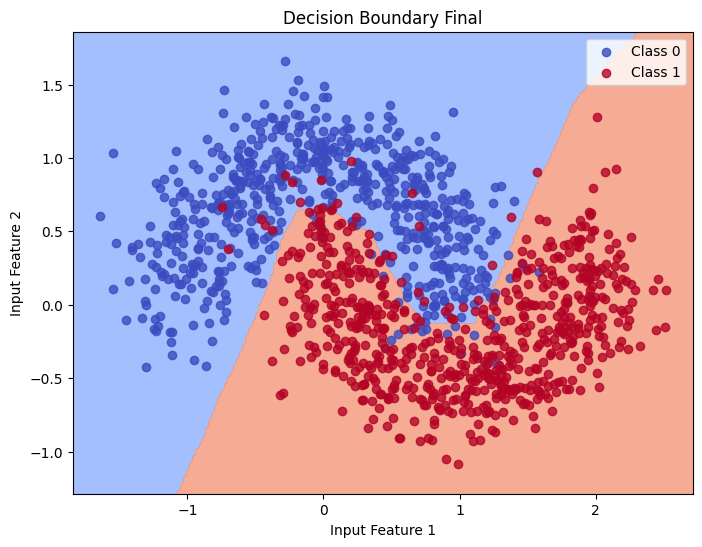

In [291]:
# --- Plot probabilidades ---
grid_output = model.predict(grid_points)[:, 1]  # Probabilidad de clase 1
grid_output = grid_output.reshape(xx.shape)

norm = colors.Normalize(vmin=0, vmax=1)  # Normalización para probabilidad 0-1
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, grid_output, levels=50, cmap='coolwarm', alpha=0.8)
scatter0 = ax.scatter(set[ytrn==0, 0], set[ytrn==0, 1], color=class_colors[0], alpha=0.8, label='Class 0')
scatter1 = ax.scatter(set[ytrn==1, 0], set[ytrn==1, 1], color=class_colors[1], alpha=0.8, label='Class 1')

ax.set_xlabel("Input Feature 1")
ax.set_ylabel("Input Feature 2")
fig.colorbar(sm, ax=ax, label="Probabilidad de clase 1")  # Asociar colorbar con 'ax'
ax.legend()
plt.show()

# --- Plot de decisión discreta ---
grid_output = model.predict(grid_points).argmax(axis=1)  # Clase predicha (0 o 1)
grid_output = grid_output.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, grid_output, levels=1, cmap='coolwarm', alpha=0.8)
scatter0 = ax.scatter(set[ytrn==0, 0], set[ytrn==0, 1], color=class_colors[0], alpha=0.8, label='Class 0')
scatter1 = ax.scatter(set[ytrn==1, 0], set[ytrn==1, 1], color=class_colors[1], alpha=0.8, label='Class 1')

ax.set_title("Decision Boundary Final")
ax.set_xlabel("Input Feature 1")
ax.set_ylabel("Input Feature 2")
ax.legend()
plt.show()
